# Centralized

The provided Python code implements a centralized portfolio optimization model using convex optimization techniques. The goal is to find optimal portfolio weights for a set of investors by maximizing a global objective function while adhering to certain constraints.

## Objective Function

```python
global_objective = cp.Maximize(cp.sum(
    [-simulated_returns[i] @ W[:, i] + 0.1 * cp.sum(W[:, i] * simulated_sigmas[i] * W[:, i]) +
     alpha * cp.sum(cp.abs(simulated_returns[i] @ W[:, i] -
                           (cp.sum([simulated_returns[j] @ W[:, j] for j in range(M)]) / M)))
     for i in range(M)]
))

The objective includes terms for maximizing expected returns, penalizing risk through the variance of portfolio returns, and encouraging a degree of similarity in the portfolio weights among investors. The adjustable parameter alpha controls the strength of the similarity term.
Constraints

python

constraints = [cp.sum(W[:, i]) == 1 for i in range(M)]

These constraints enforce that each investor's capital is fully invested.
Optimization and Results

The code uses the CVXPY library to define and solve the convex optimization problem. The solution provides the optimal portfolio weights for each investor that simultaneously maximize returns, minimize risk, and encourage similarity in investment strategies.

The final results include the optimized portfolio weights for each investor and the corresponding objective value. Additionally, the code plots the portfolio weights for each investor over the iterations, providing insights into the convergence behavior of the optimization process.

The use of disciplined convex programming principles ensures that the optimization problem is mathematically well-defined and can be efficiently solved using convex optimization techniques.

In [19]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Number of investors
M = 5

# Number of assets in the portfolio
N = 100

# Set random initial portfolio weights for each investor
initial_weights = np.random.rand(M, N)
initial_weights /= np.sum(initial_weights, axis=1, keepdims=True)  # Normalize to ensure weights sum to 1

# Define investor-specific data (simulated returns and standard deviations)
simulated_returns = np.random.rand(M, N)
simulated_sigmas = np.random.rand(M, N)

# Lists to store portfolio weights for each investor at each iteration
portfolio_weights_history = []

# Define decision variables
W = cp.Variable((N, M), nonneg=True)

# Define alpha (adjustable parameter)
alpha = 0.1

# Define the objective function
global_objective = cp.Maximize(cp.sum(
    [-simulated_returns[i] @ W[:, i] + 0.1 * cp.sum(W[:, i] * simulated_sigmas[i] * W[:, i]) +
     alpha * cp.sum(cp.abs(simulated_returns[i] @ W[:, i] -
                           (cp.sum([simulated_returns[j] @ W[:, j] for j in range(M)]) / M)))
     for i in range(M)]
))

# Define the constraint: sum of weights for each investor is 1
constraints = [cp.sum(W[:, i]) == 1 for i in range(M)]

# Solve the optimization problem
problem = cp.Problem(global_objective, constraints)
problem.solve()

# Print the final optimized portfolio weights for each investor
final_portfolio_weights = W.value
for i in range(M):
    print(f"Investor {i + 1} Final Optimized Portfolio Weights:")
    print(final_portfolio_weights[:, i])
    print("\n")

# Print the final objective value
print("Final Optimized Objective Value:", problem.value)

# Plot portfolio weights for each investor over iterations
for i in range(M):
    plt.plot(range(1, num_iterations + 1), [weights[i] for weights in portfolio_weights_history], label=f"Investor {i + 1}")

plt.xlabel("Iteration")
plt.ylabel("Portfolio Weight")
plt.title("Portfolio Weights for Each Investor Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\SHAAHIN\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 26 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\SHAAHIN\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 27 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\SHAAH

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
Promote(var2003[0:100, 0] @ [0.69425245 0.70982142 0.01126959 0.51957487 0.68428731 0.73425503
 0.22495615 0.27657376 0.1302407  0.93290263 0.25708613 0.16461753
 0.18872201 0.39454065 0.14088315 0.50669558 0.34821365 0.34849592
 0.28789909 0.02572933 0.96466591 0.48847997 0.81689697 0.11153879
 0.45670022 0.67399007 0.08953609 0.34261373 0.13579134 0.22039238
 0.25442842 0.66335239 0.89700882 0.38248728 0.57209565 0.54860745
 0.43567252 0.18562382 0.78884326 0.3521411  0.95790934 0.60849851
 0.66230805 0.2139775  0.24479435 0.74148608 0.72408344 0.43657288
 0.26772003 0.1271751  0.43017799 0.58032983 0.94982648 0.40672873
 0.48699542 0.30769386 0.48210327 0.48155636 0.63829946 0.3656295
 0.07343641 0.03771813 0.96572492 0.77570443 0.22070676 0.0413058
 0.3652397  0.22370243 0.56803376 0.55266518 0.23391832 0.37342447
 0.68639527 0.17779364 0.2050298  0.1683849  0.30969147 0.88219028
 0.59644406 0.1402272  0.90604938 0.13984118 0.63761866 0.03713398
 0.62125308 0.74303863 0.90109515 0.05940731 0.6058866  0.02274107
 0.95608227 0.41143446 0.44263344 0.10404642 0.4194807  0.82202589
 0.09717336 0.68456606 0.01276997 0.55633296], (100,)) @ var2003[0:100, 0]
Promote(var2003[0:100, 1] @ [0.15250546 0.68520553 0.52884424 0.57893444 0.03236719 0.9411201
 0.63708455 0.13560548 0.23310635 0.68055789 0.70080757 0.93339154
 0.23251984 0.43747294 0.90518641 0.95915617 0.43989116 0.55382373
 0.68129415 0.34783454 0.73419452 0.93094558 0.16460803 0.40673305
 0.67211434 0.01361027 0.64498488 0.17331545 0.79409574 0.58304529
 0.11962534 0.85029485 0.98714672 0.00565616 0.17906485 0.58602387
 0.71474145 0.71656503 0.00471632 0.74814518 0.40690176 0.86483799
 0.30454056 0.65995692 0.74701519 0.81146362 0.85670481 0.86979819
 0.89217532 0.08716338 0.57767964 0.87407525 0.97201875 0.89869168
 0.89639227 0.1994123  0.08964706 0.98423669 0.38268251 0.93439357
 0.80368875 0.73039376 0.23942198 0.58894887 0.02260361 0.76697153
 0.39238609 0.64799215 0.43459819 0.15824732 0.86002145 0.4403341
 0.43401884 0.47513199 0.8681997  0.20839191 0.3414853  0.89297919
 0.3940533  0.21581586 0.91948949 0.66656882 0.01760929 0.21356968
 0.11188802 0.52417479 0.74411244 0.16021224 0.30600156 0.93949321
 0.18968293 0.38351879 0.05402669 0.83568424 0.74048676 0.47983898
 0.70093058 0.19272816 0.39760907 0.59972521], (100,)) @ var2003[0:100, 1]
Promote(var2003[0:100, 2] @ [0.0256735  0.59602146 0.10548638 0.15960578 0.19999749 0.21354354
 0.47938391 0.98454934 0.64720707 0.18281231 0.11700906 0.54444465
 0.80569898 0.15147986 0.17224887 0.86870167 0.98253303 0.12246594
 0.71789024 0.04008376 0.36489636 0.55582387 0.01551096 0.56081005
 0.91584648 0.53570229 0.34368602 0.09484764 0.02486394 0.24758158
 0.40000757 0.65079154 0.92825639 0.00908679 0.48976956 0.16107812
 0.96875933 0.37506491 0.82595282 0.07076746 0.78188875 0.03580502
 0.56831326 0.43218186 0.86456526 0.80848746 0.504176   0.36770368
 0.14598729 0.23965984 0.17693028 0.91550489 0.4418764  0.37038296
 0.42985592 0.03224278 0.85245516 0.60531891 0.76531417 0.02467575
 0.79924016 0.56909803 0.45443465 0.32899528 0.4916001  0.04991683
 0.22765029 0.26360164 0.06495754 0.33601104 0.33342932 0.01079264
 0.59170105 0.18584561 0.71023596 0.00735331 0.99608627 0.07977627
 0.48120497 0.0761716  0.75617349 0.26126635 0.36275932 0.34524294
 0.4779717  0.04276271 0.41030263 0.4770656  0.35416716 0.61358215
 0.67866948 0.5647873  0.60707421 0.57176753 0.03281651 0.94671006
 0.07532297 0.99505544 0.60993298 0.27712991], (100,)) @ var2003[0:100, 2]
Promote(var2003[0:100, 3] @ [0.35473237 0.08643536 0.37204436 0.73675915 0.34308565 0.17501667
 0.45197532 0.93710408 0.31086012 0.55679138 0.45628345 0.26142113
 0.24302921 0.18214596 0.45145435 0.00633726 0.14294195 0.12672762
 0.09675355 0.98535432 0.14446154 0.29588109 0.67162419 0.03848009
 0.53000017 0.85558857 0.52934245 0.27875596 0.48556266 0.060252
 0.27574371 0.77080964 0.42257072 0.98414979 0.30613627 0.95484954
 0.01366527 0.79030223 0.86732498 0.84944013 0.76958923 0.71439632
 0.11118386 0.36317341 0.77395459 0.10060106 0.28277093 0.25877488
 0.87638362 0.20886314 0.7012665  0.98338723 0.39460536 0.4232996
 0.60290584 0.51088288 0.79906029 0.30272743 0.17738673 0.72855435
 0.3049304  0.17978978 0.89159762 0.80792381 0.07764215 0.2129496
 0.62060894 0.09858773 0.33443418 0.79745113 0.70916547 0.55834794
 0.04569013 0.63508937 0.8120404  0.54672984 0.62979629 0.4284465
 0.07170587 0.11680389 0.01431918 0.95417134 0.9104719  0.17691716
 0.9044692  0.20307015 0.75720639 0.94750149 0.53009891 0.42767782
 0.16703992 0.71179976 0.09081429 0.06541788 0.10530853 0.58735003
 0.15692789 0.32038092 0.00764191 0.033328  ], (100,)) @ var2003[0:100, 3]
Promote(var2003[0:100, 4] @ [0.22126876 0.75896887 0.87612847 0.85316478 0.70152632 0.20868235
 0.47772172 0.80039698 0.40413226 0.30526502 0.22978414 0.85336434
 0.25334947 0.99216142 0.78756235 0.37021207 0.87534685 0.38326074
 0.23817834 0.30311716 0.17199637 0.62588034 0.77555496 0.63725492
 0.41160523 0.95109093 0.77608866 0.55697065 0.11821775 0.44688605
 0.68368792 0.09164286 0.37520198 0.40529433 0.07307905 0.01332924
 0.13003832 0.43925024 0.74900154 0.73231598 0.47807124 0.98402423
 0.31280794 0.18310298 0.88767799 0.9483334  0.51827657 0.53144219
 0.77875401 0.79022944 0.0383812  0.03691995 0.76180329 0.80097355
 0.1067329  0.22861268 0.31232706 0.50268507 0.22972921 0.96569245
 0.6413649  0.10016565 0.30730312 0.84871085 0.82882334 0.01609292
 0.61631284 0.42647541 0.64500944 0.08290765 0.56748816 0.84234966
 0.01701846 0.98083351 0.96375085 0.38373012 0.12393413 0.88703847
 0.23449076 0.36626804 0.86424767 0.79402548 0.80161194 0.771344
 0.96650216 0.38766597 0.73649051 0.39465408 0.78770213 0.11445953
 0.3264721  0.42013964 0.28031674 0.68436474 0.66284537 0.31436464
 0.29198688 0.19036285 0.48746706 0.39250568], (100,)) @ var2003[0:100, 4]

# ADMM Portfolio Optimization

This Python code implements the Alternating Direction Method of Multipliers (ADMM) for decentralized portfolio optimization.

## Components:

1. **Problem Description:**
   - Optimize asset weights for multiple investors.
   - Objective includes returns maximization, risk penalization, and portfolio weight similarity.

2. **ADMM Solver:**
   - Decomposes the optimization into local subproblems.
   - Updates local portfolio weights and a global variable iteratively.

3. **Solver Parameters:**
   - `simulated_returns`: Investor returns matrix.
   - `simulated_sigmas`: Investor risk matrix.
   - `rho`, `alpha`: Penalty and coupling parameters.
   - `max_iterations`, `epsilon`: Maximum iterations and convergence threshold.

4. **Results:**
   - Portfolio weights for each investor printed at each iteration.
   - Plots showing the evolution of average portfolio weights and the main objective function value.

5. **Usage:**
   - Call `admm_solver` with relevant parameters.

6. **Visualization:**
   - Inspect plots for convergence insights.

Iteration 1 - Portfolio Weights:
Investor 1: [0.13237205 0.06675665 0.04497655 0.30724073 0.05986599 0.06624318
 0.10178611 0.10360135 0.074917   0.04224038]
Investor 2: [0.08192819 0.02967429 0.62122696 0.05880859 0.01257151 0.01438311
 0.08429923 0.04428046 0.03213956 0.02068811]
Investor 3: [0.11445694 0.21175466 0.164539   0.0706527  0.02289587 0.06371575
 0.08683659 0.00079737 0.07390619 0.19044494]
Investor 4: [0.08641838 0.1196318  0.07263771 0.05948281 0.0692147  0.09853745
 0.04204765 0.04409063 0.07026622 0.33767266]
Investor 5: [0.02033735 0.04313306 0.03145966 0.05802892 0.04928335 0.14563962
 0.29961067 0.12229403 0.21023104 0.0199823 ]
Iteration 2 - Portfolio Weights:
Investor 1: [0.13237205 0.06675665 0.04497655 0.30724073 0.05986599 0.06624318
 0.10178611 0.10360135 0.074917   0.04224038]
Investor 2: [0.08192819 0.02967429 0.62122696 0.05880859 0.01257151 0.01438311
 0.08429923 0.04428046 0.03213956 0.02068811]
Investor 3: [0.11445694 0.21175466 0.164539   0.0706527  0.

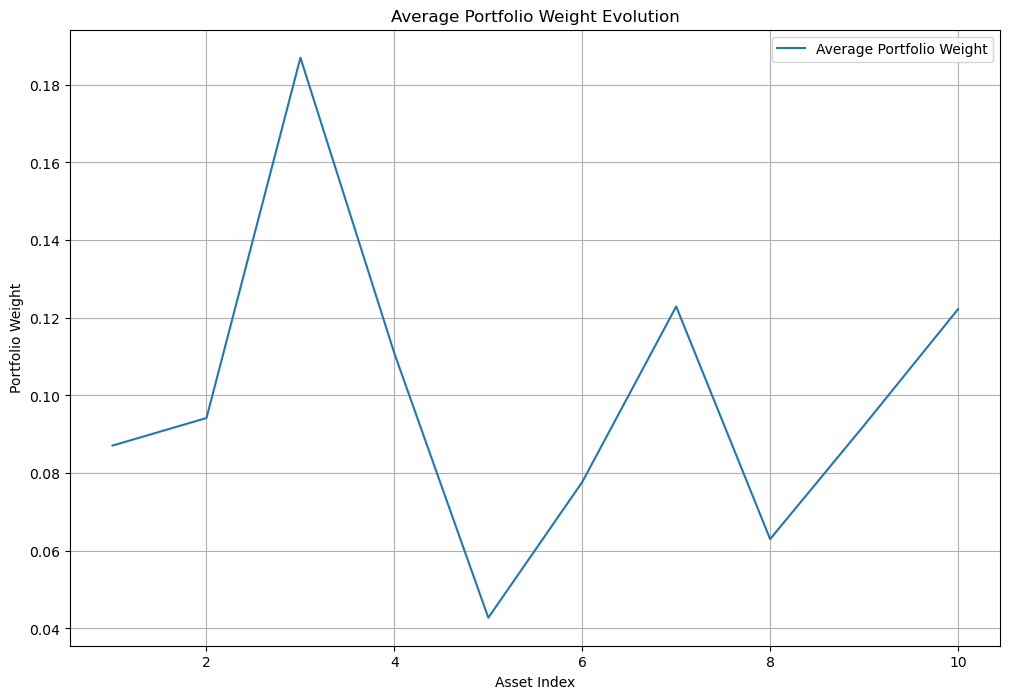

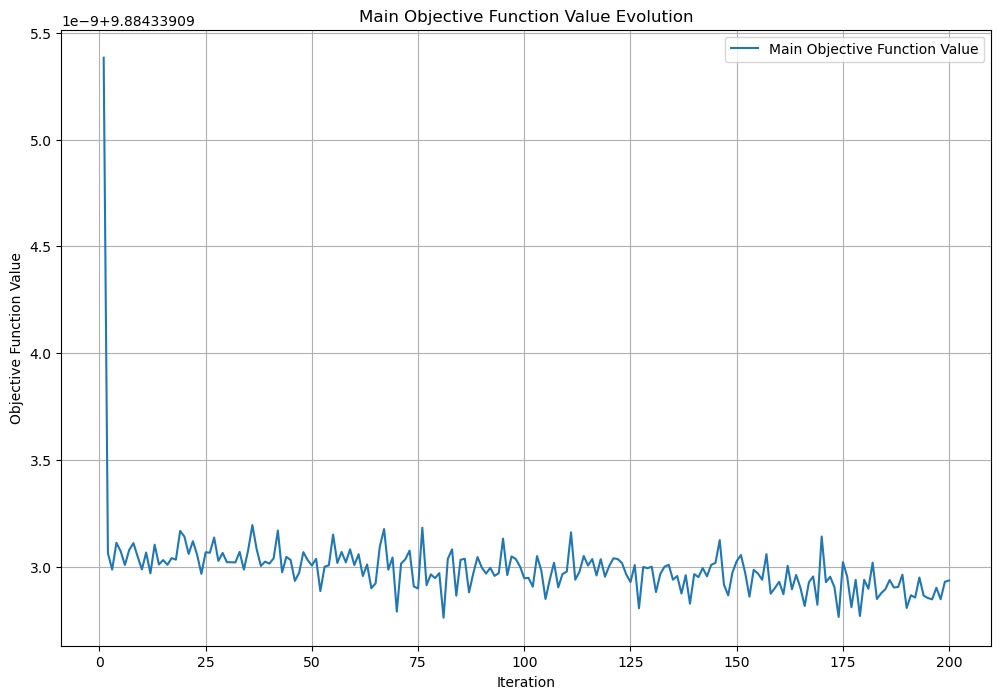

In [46]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Number of investors
M = 5

# Number of assets in the portfolio
N = 10

initial_weights = np.random.rand(M, N)
initial_weights /= np.sum(initial_weights, axis=1, keepdims=True)  # Normalize to ensure weights sum to 1

simulated_returns = np.random.rand(M, N)
simulated_sigmas = np.random.rand(M, N)

global_variable = np.mean(simulated_returns)

rho = 0.1  # Penalty parameter
alpha = 1  # Parameter controlling the impact of the coupling term
max_iterations = 100  
epsilon = 1e-6  

def admm_solver(simulated_returns, simulated_sigmas, rho, alpha, max_iterations, epsilon):
    # Define variables
    W = cp.Variable((M, N))
    Z = cp.Variable(N)

    def local_cost_function(W_i, R_i, Sigma_i):
        return -cp.sum(cp.multiply(R_i, W_i)) + cp.quad_form(W_i, Sigma_i) + alpha * cp.abs(cp.sum(cp.multiply(R_i, W_i)) - global_variable)

    # ADMM update steps
    W_history = []
    for iteration in range(max_iterations):
        # Update W_i for each investor
        normalized_weights = []
        for i in range(M):
            local_objective = local_cost_function(W[i], simulated_returns[i], np.diag(simulated_sigmas[i]))
            regularization_term = (rho / 2) * cp.norm(W[i] - Z, 2)**2
            constraints = [cp.sum(W[i]) == 1]

            # Separate the objective and constraints
            objective = cp.Minimize(local_objective + regularization_term)
            problem = cp.Problem(objective, constraints)

            problem.solve()
            normalized_weights.append(W[i].value / np.sum(W[i].value))  # Normalize weights

        W_history.append(normalized_weights)

        # Update Z
        Z.value = np.mean([w for w in normalized_weights], axis=0)

        # Print current iteration's portfolio weights
        print(f"Iteration {iteration + 1} - Portfolio Weights:")
        for i in range(M):
            print(f"Investor {i + 1}: {normalized_weights[i]}")

    return W_history, Z.value
W_history, Z_result = admm_solver(simulated_returns, simulated_sigmas, rho, alpha, max_iterations, epsilon)

average_weights = np.mean(W_history, axis=(0, 1))
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(average_weights) + 1), average_weights, label="Average Portfolio Weight")
plt.xlabel("Asset Index")
plt.ylabel("Portfolio Weight")
plt.title("Average Portfolio Weight Evolution")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(objective_values) + 1), objective_values, label="Main Objective Function Value")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Main Objective Function Value Evolution")
plt.legend()
plt.grid(True)
plt.show()


# Fast ADMM Portfolio Optimization

This Python code implements a fast version of the Alternating Direction Method of Multipliers (ADMM) for decentralized portfolio optimization.

## Components:

1. **Problem Description:**
   - Optimize asset weights for multiple investors.
   - Objective includes returns maximization, risk penalization, and portfolio weight similarity.

2. **Fast ADMM Solver:**
   - Employs ADMM for decentralized optimization.
   - Enhancements for faster convergence.

3. **Solver Parameters:**
   - `simulated_returns`: Investor returns matrix.
   - `simulated_sigmas`: Investor risk matrix.
   - `rho`, `alpha`: Penalty and coupling parameters.
   - `max_iterations`, `epsilon`: Maximum iterations and convergence threshold.


Iteration 1 - Portfolio Weights:
Investor 1: [ 4.57127381  5.56937252  4.9398601  -2.60413508 -3.18088821 -0.31682872
  0.34562262 -4.39119541 -3.15396892  3.73881107]
Investor 2: [-3.0094047  -2.97475795 -1.66202315 -3.64187547 -3.12242393 -2.46703936
  4.67103188 11.99460225 -1.23793468 -1.23057651]
Investor 3: [-0.54182461  0.53631424 -2.10854974 -0.58550159  2.97895709 -3.39340018
 -0.04473947  5.36703743 -1.1884795  -0.54880629]
Investor 4: [-2.92322998 -2.60581867 -4.8560948  38.99554828 -3.59083565 -3.33941437
 -3.12850026 -8.46051634 -3.41629659 -2.87162649]
Investor 5: [ 3.90817116 -1.40837519 -2.42388091 -4.28253944 -1.90271798  3.15403724
 -0.33596545 30.63199712 -1.58187883 -2.10010879]
Investor 6: [ 0.61609514  0.06631052 -1.27936762 -3.98036121 -0.61435217 -2.1218845
 15.18203067 -5.72688127 -1.6377229   0.34616165]
Investor 7: [11.46820013  3.8799875  -2.08777612 -0.46097968 -0.6434442   1.02313882
 -2.56182033  6.42928419  1.45222646 -2.33085333]
Investor 8: [-1.2120428

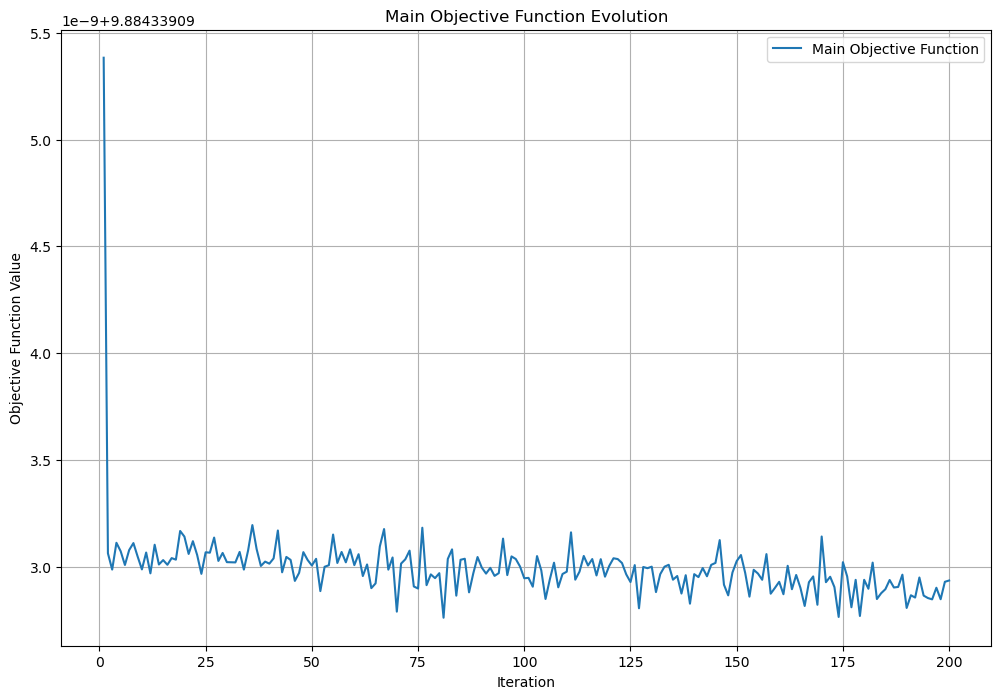

In [43]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def fast_admm_solver(simulated_returns, simulated_sigmas, rho, alpha, max_iterations, epsilon):
    M, N = simulated_returns.shape
    W = [cp.Variable(N) for _ in range(M)]
    P = [cp.Variable(N) for _ in range(M)]
    Z = cp.Variable(N)
    U = [cp.Variable(N) for _ in range(M)]

    global_objective = sum([-simulated_returns[i] @ W[i] + 0.1 * cp.quad_form(W[i], np.diag(simulated_sigmas[i])) +
                            alpha * cp.norm1(simulated_returns[i] @ W[i] - sum(simulated_returns[j] @ W[j] for j in range(M)) / M) for i in range(M)])

    augmented_lagrangian = global_objective
    for i in range(M):
        augmented_lagrangian += 0.9 * (rho / 2) * cp.sum_squares(P[i] - W[i] + Z - U[i])

    admm_problem = cp.Problem(cp.Minimize(augmented_lagrangian))
    
    objective_values = []
    portfolio_histories = []

    for iteration in range(max_iterations):
        admm_problem.solve()

        for i in range(M):
            # Update W_i and P_i
            W[i].value = P[i].value
            P[i].value = (W[i].value + U[i].value + Z.value) / 3

        # Update Z
        Z.value = np.mean([P[i].value + U[i].value for i in range(M)], axis=0)

        # Update U_i for each investor
        for i in range(M):
            U[i].value = U[i].value + (P[i].value - Z.value)

        # Convergence check
        r_norm = np.mean([np.linalg.norm(P[i].value - Z.value) for i in range(M)])
        s_norm = 0.9 * rho * np.linalg.norm(Z.value - Z.value)

        objective_values.append(global_objective.value)
        portfolio_histories.append([W[i].value.tolist() for i in range(M)])

        print(f"Iteration {iteration + 1} - Portfolio Weights:")
        for i in range(M):
            print(f"Investor {i + 1}: {W[i].value}")

        if max(r_norm, s_norm) < epsilon:
            print("Converged.")
            break

    return portfolio_histories, Z.value, objective_values

# Example usage:
M = 15
N = 10
simulated_returns = np.random.rand(M, N)
simulated_sigmas = np.random.rand(M, N)
rho = 0.2
alpha = 1
max_iterations = 200
epsilon = 1e-6
portfolio_histories, Z_result, objective_values = fast_admm_solver(simulated_returns, simulated_sigmas, rho, alpha, max_iterations, epsilon)

# Plot the main objective function value over iterations
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(objective_values) + 1), objective_values, label="Main Objective Function")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Main Objective Function Evolution")
plt.legend()
plt.grid(True)
plt.show()


# Primal Decomposition Portfolio Optimization

This Python code implements a primal decomposition approach for decentralized portfolio optimization.

## Components:

1. **Problem Setup:**
   - Optimize asset weights for multiple investors.
   - Randomly initialize portfolio weights, returns, and standard deviations.

2. **Local Cost Function:**
   - Define a local cost function for each investor.
   - Includes returns maximization, risk penalization, and portfolio weight similarity.

3. **Global Objective Function:**
   - Define a global objective to optimize the average return.

4. **Primal Decomposition Iteration:**
   - Iterate through local optimizations for each investor.
   - Update global variable (average return).
   - Check for convergence based on changes in local costs.

5. **Convergence Criteria:**
   - Converge when the change in local costs for all investors is below a threshold.


Iteration 1, Investor 1 - Reward: -33172385.0590
Optimal Portfolio Weights:
[ 10924511.42945318 -15665410.78968193  10917951.70552818
 -17131473.85806538 -17873266.23042898  14796472.33999334
    511498.61716334  -6706743.0154461    6362003.69568016
   3317594.23624061 -16544936.30430707   7992055.44528665
  15802232.27372968   4360435.1946598   11601741.36558527
  -8671612.49438937 -15567692.66600325  -3380780.1221059
  -1895129.84949658  14862589.05039538  15978004.08362785
  10928438.60667224  -2411680.08743288   4508631.35418316
 -20119307.45605337  -6664456.43208529  15256016.16707959
  -9003337.81651424  13888451.85663826   1062907.3368322
 -16714474.47733898    891395.32315381   6572369.49816203
  16019185.9770464   -4463481.99733658   9625382.86830261
   7186233.05576133 -12503125.72606648  15370137.5462842
 -17697629.21551747 -14338259.22679078 -20426294.93123388
  -3736545.87154017 -17259554.20435384  -5448614.56946854
 -12952837.83049705   3194491.36858324   4924455.84485465

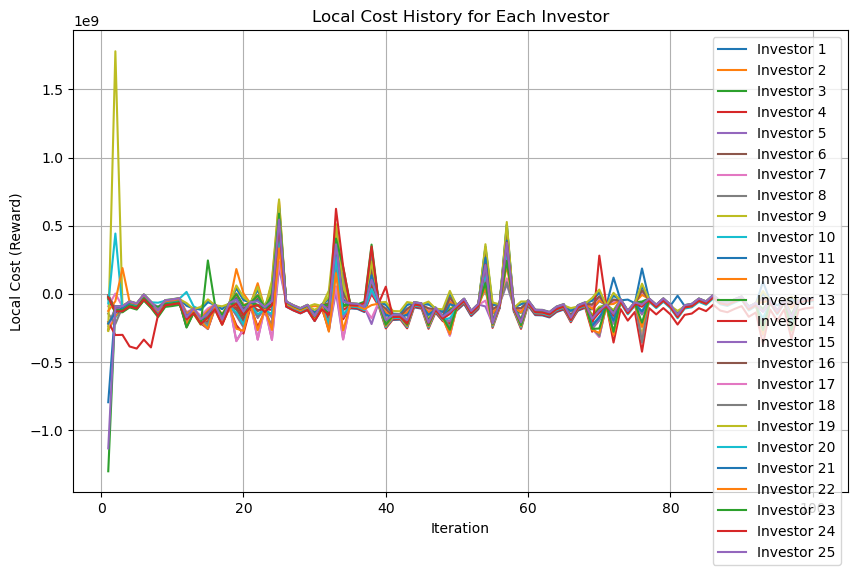

In [27]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Number of investors
M = 25
# Number of assets in the portfolio
N = 100

# Set random initial portfolio weights for each investor
initial_weights = np.random.rand(M, N)
initial_weights /= np.sum(initial_weights, axis=1, keepdims=True)  # Normalize to ensure weights sum to 1

# Define investor-specific data (simulated returns and standard deviations)
simulated_returns = np.random.rand(M, N)
simulated_sigmas = np.random.rand(M, N)

# Define global variable (average return)
global_variable = np.mean(simulated_returns)

# Define local cost functions
def local_cost_function(investor_weights, investor_return, investor_sigma, alpha):
    return -np.dot(investor_return, investor_weights) + 0.1 * np.dot(investor_sigma, investor_weights) + alpha * np.abs(np.dot(investor_return, investor_weights) - global_variable)

# Define the global objective function
def global_objective(weights):
    global_return = np.dot(np.mean(simulated_returns, axis=0), weights)
    return -global_return  # Minimize negative return (maximize return)

# Lists to store rewards for each investor at each iteration
reward_history = [[] for _ in range(M)]

# Perform primal decomposition iteration
convergence_threshold = 1e-6
for iteration in range(100):  # Set the number of iterations
    # Local Optimization
    for investor in range(M):
        # Define the local objective function for the current investor
        local_objective = lambda x: local_cost_function(x, simulated_returns[investor], simulated_sigmas[investor], 1.0)

        # Perform local optimization for the current investor
        result = minimize(local_objective, initial_weights[investor], constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
        initial_weights[investor] = result.x / np.sum(result.x)  # Normalize weights

        # Append the reward (local cost) to the history
        reward_history[investor].append(local_objective(result.x))
        print(f"Iteration {iteration + 1}, Investor {investor + 1} - Reward: {reward_history[investor][-1]:.4f}")
        print("Optimal Portfolio Weights:")
        print(initial_weights[investor])
        print("\n")

    # Update Global Variable
    global_result = minimize(global_objective, np.mean(initial_weights, axis=0), constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
    global_variable = -global_result.fun  # Minimize negative global return (maximize global return)

    # Check for convergence
    if iteration > 0:  # Skip the check for the first iteration
        convergences = [np.abs(reward_history[investor][-1] - reward_history[investor][-2]) for investor in range(M)]
        if all(convergence < convergence_threshold for convergence in convergences):
            print("Converged.")
            break

# Plotting the reward history for each investor
plt.figure(figsize=(10, 6))
for investor in range(M):
    plt.plot(range(1, iteration + 2), reward_history[investor], label=f"Investor {investor + 1}")

plt.xlabel("Iteration")
plt.ylabel("Local Cost (Reward)")
plt.title("Local Cost History for Each Investor")
plt.legend()
plt.grid(True)
plt.show()
